TSF TASK 2 
BY - NEELAM TANWAR

#LANGUAGE :PYTHON

#IDE : JUPYTER

#TASK : FROM IRIS DATASET PREDICT THE OPTIMUM NUMBER OF CLUSTER AND VISUALISE IT

In [1]:
import warnings
warnings.filterwarnings("ignore")
#IMPORTING IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets
 #loading the dataset
iris= datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


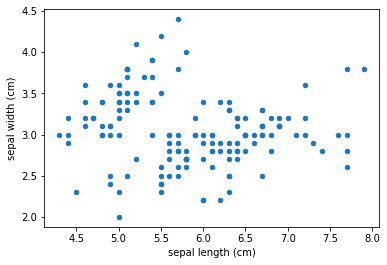

In [15]:
#visualising 
iris_df.plot(kind="scatter", x="sepal length (cm)",   y="sepal width (cm)")
plt.show()

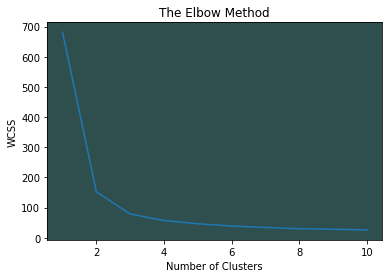

In [4]:
x = iris_df.iloc[:,[0,1,2,3]].values #extracting independent variables
#finding the optimum number of cluster
from sklearn.cluster import KMeans
wcss = []
#using for loop for iteration from 1 to 10
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
ax = plt.axes()
ax.set_facecolor("darkslategray")
plt.plot(range(1,11),wcss) 
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS") #WCSS = Within cluster sum square
plt.show()

#Elbow method provides us the number of clusters to be found here we could see elbow around point 3
Hence we will form number of cluster = 3

In [16]:
#creating the k means classifier 
kmeans = KMeans(n_clusters = 3 ,init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [17]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

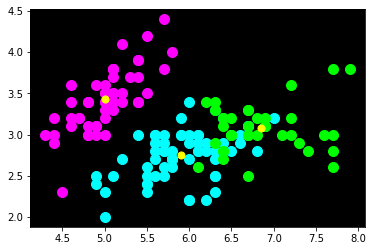

In [6]:
#visualising the clusters
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s = 100 , c = 'cyan', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s = 100 , c = 'magenta', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s = 100 , c = 'lime', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroid')  

here we could see three clusters 
1. cluster with blue shade is Iris-setosa
2. cluster with purple shade is iris-versicolour
3. cluster with green shade is Iris-virginica

# THANK YOU